Purpose: Find the core gene sets from random forest. <br>
Author: Anna Pardo<br>
Date initiated: Mar. 22, 2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from venn import venn

In [2]:
# function to pull out the top N features in a given dict
def topN(fi_dict,N):
    topNdict = {}
    for k in fi_dict:
        df = fi_dict[k]
        topNdict[k] = df.head(n=N)
        
    setstopN = {}
    for k in topNdict:
        setstopN[k] = set(list(topNdict[k]["GeneID"]))
        
    setslist = [setstopN["Cold"],setstopN["Heat"],setstopN["Flooding"],setstopN["Low_Nitrogen"],setstopN["Drought"],
               setstopN["Salt"]]
    
    totalgenes = set.union(*setslist)
    coregenes = set.intersection(*setslist)
    
    print((len(coregenes)/len(totalgenes))*100)
    
    return totalgenes, coregenes

In [3]:
# build a function for top predictor extraction
def extract_top_preds(directory,number):
    # make dictionary of FI dataframes
    fid = {}
    for subd in os.listdir(directory):
        s = subd.split("T")[0]
        for f in os.listdir(directory+subd):
            if f.endswith("_sorted.tsv"):
                fid[s] = pd.read_csv(directory+subd+"/"+f,sep="\t",header="infer")
                
    tgN, cgN = topN(fid,number)
    
    return tgN, cgN

In [4]:
psyn_total, psyn_core = extract_top_preds("../../data/RF_outputs_bpcor_psyn/",6000)

1.847081392162236


In [5]:
all_total, all_core = extract_top_preds("../../data/RF_outputs_bpcor_all/",6000)

3.1307880743263428


In [6]:
# make a function to load & wrangle core genes from set ops
def setopscore(upfile,downfile):
    cgup = pd.read_csv(upfile,sep="\t",header=None)
    cgdown = pd.read_csv(downfile,sep="\t",header=None)
    
    cgu = set(list(cgup[0]))
    cgd = set(list(cgdown[0]))
    
    return cgu.union(cgd)

In [7]:
d = "../../data/"
all_socore = setopscore(os.path.join(d,"core_upgenes_fromsets_all_corrBP.txt"),
                        os.path.join(d,"core_downgenes_fromsets_all_corrBP.txt"))
psyn_socore = setopscore(os.path.join(d,"core_upgenes_fromsets_psyn_corrBP.txt"),
                        os.path.join(d,"core_downgenes_fromsets_psyn_corrBP.txt"))

In [8]:
# how much overlap is there between RF & set ops core genes for each dataset?
print("Overlap between RF & set ops for all samples corrected:",len(all_socore.intersection(all_core)))
print("Overlap between RF & set ops for photosynthetic tissues corrected:",len(psyn_socore.intersection(psyn_core)))

Overlap between RF & set ops for all samples corrected: 35
Overlap between RF & set ops for photosynthetic tissues corrected: 14


In [9]:
# how many total core genes are there for each dataset?
all_fullcore = all_socore.union(all_core)
psyn_fullcore = psyn_socore.union(psyn_core)

print("Number of total core genes for all samples corrected:",len(all_fullcore))
print("Number of total core genes for photosynthetic tissues corrected:",len(psyn_fullcore))

Number of total core genes for all samples corrected: 744
Number of total core genes for photosynthetic tissues corrected: 512


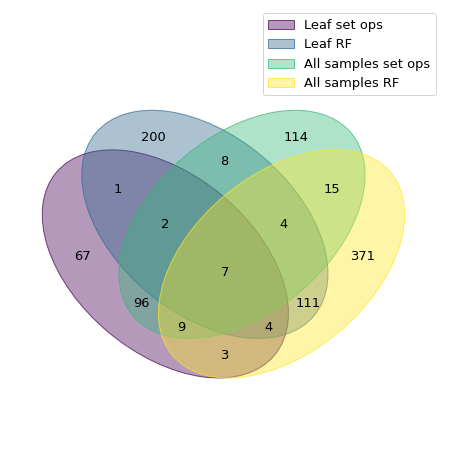

In [45]:
corrvenn = {"Leaf set ops":psyn_socore,"Leaf RF":psyn_core,"All samples set ops":all_socore,"All samples RF":all_core}
venn(corrvenn)
plt.savefig("../../figures/02-Apr-2024_coregenes_overlaps.svg",bbox_inches="tight")
plt.savefig("../../figures/02-Apr-2024_coregenes_overlaps.png",bbox_inches="tight")
plt.savefig("../../figures/02-Apr-2024_coregenes_overlaps.pdf",bbox_inches="tight")

<AxesSubplot: >

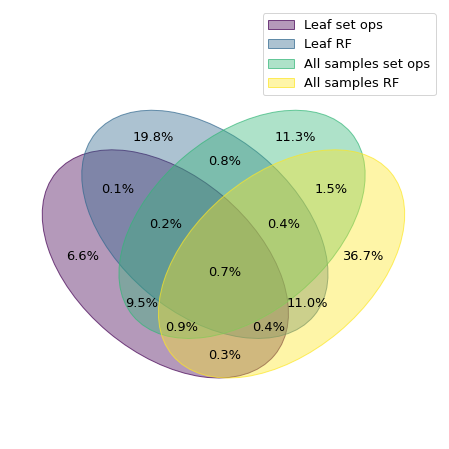

In [11]:
venn(corrvenn,fmt="{percentage:.1f}%")

<AxesSubplot: >

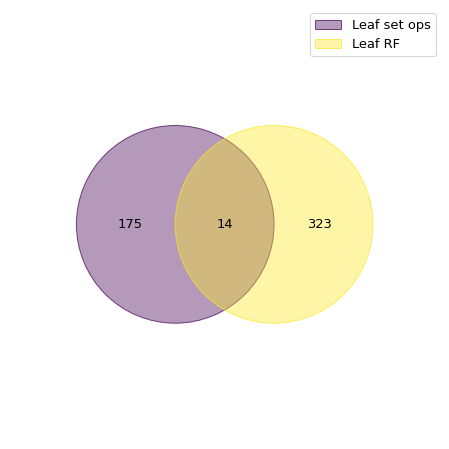

In [12]:
venn({"Leaf set ops":psyn_socore,"Leaf RF":psyn_core})

<AxesSubplot: >

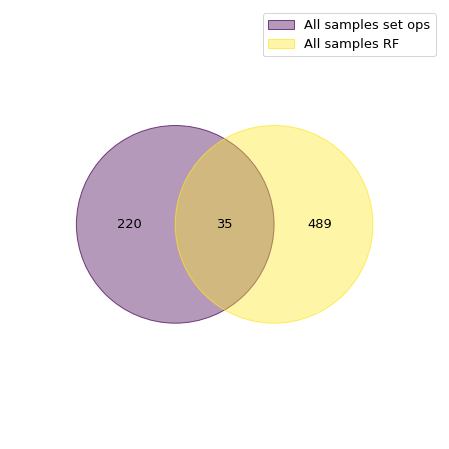

In [13]:
venn({"All samples set ops":all_socore,"All samples RF":all_core})

In [14]:
def setops_core_reg(upfile,downfile):
    cgup = pd.read_csv(upfile,sep="\t",header=None)
    cgdown = pd.read_csv(downfile,sep="\t",header=None)
    
    cgu = set(list(cgup[0]))
    cgd = set(list(cgdown[0]))
    
    return cgu,cgd

In [15]:
d = "../../data/"
all_socore_up,all_socore_down = setops_core_reg(os.path.join(d,"core_upgenes_fromsets_all_corrBP.txt"),
                        os.path.join(d,"core_downgenes_fromsets_all_corrBP.txt"))
psyn_socore_up,psyn_socore_down = setops_core_reg(os.path.join(d,"core_upgenes_fromsets_psyn_corrBP.txt"),
                        os.path.join(d,"core_downgenes_fromsets_psyn_corrBP.txt"))

In [16]:
# load the fold change data - find out whether RF core genes are DE at all
fcpsyn = {}
fcall = {}
d = "../../data/corrected_tpm_foldchange/"
for f in os.listdir(d):
    s = f.split("_F")[0]
    if "psyn" in f:
        fcpsyn[s] = pd.read_csv(os.path.join(d,f),sep="\t",header="infer")
    else:
        fcall[s] = pd.read_csv(os.path.join(d,f),sep="\t",header="infer")

/tmp/ipykernel_16630/4145050313.py:10: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  fcall[s] = pd.read_csv(os.path.join(d,f),sep="\t",header="infer")
/tmp/ipykernel_16630/4145050313.py:10: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  fcall[s] = pd.read_csv(os.path.join(d,f),sep="\t",header="infer")
/tmp/ipykernel_16630/4145050313.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  fcpsyn[s] = pd.read_csv(os.path.join(d,f),sep="\t",header="infer")
/tmp/ipykernel_16630/4145050313.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  fcpsyn[s] = pd.read_csv(os.path.join(d,f),sep="\t",header="infer")
/tmp/ipykernel_16630/4145050313.py:10: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  fcall[s] = pd.read_csv(os.path.

In [17]:
fcpsyn["Low_Nitrogen"].head()

,GeneID,Stressor,Control,Stressed,FoldChange,BioProject
0,Zm00001eb000010,Low_Nitrogen,2.313719,4.710741,1.723363,PRJNA420600
1,Zm00001eb000020,Low_Nitrogen,0.651591,5.088766,3.686607,PRJNA420600
2,Zm00001eb000050,Low_Nitrogen,0.018327,0.034124,1.015512,PRJNA420600
3,Zm00001eb000060,Low_Nitrogen,6.097323,18.082150,2.688641,PRJNA420600
4,Zm00001eb000070,Low_Nitrogen,0.101540,0.166733,1.059183,PRJNA420600


In [18]:
# make sets of up- & downregulated genes for each stressor
psyndegs = {"Up":{},"Down":{}}
alldegs = {"Up":{},"Down":{}}
for s in ["Low_Nitrogen","Drought","Cold","Heat","Flooding","Salt"]:
    pdf = fcpsyn[s]
    adf = fcall[s]
    psyndegs["Up"][s] = set(list(pdf[pdf["FoldChange"]>2]["GeneID"].unique()))
    psyndegs["Down"][s] = set(list(pdf[pdf["FoldChange"]<0.5]["GeneID"].unique()))
    alldegs["Up"][s] = set(list(adf[adf["FoldChange"]>2]["GeneID"].unique()))
    alldegs["Down"][s] = set(list(adf[adf["FoldChange"]<0.5]["GeneID"].unique()))

In [19]:
psynup = set.union(*list(psyndegs["Up"].values()))
psyndown = set.union(*list(psyndegs["Down"].values()))
allup = set.union(*list(alldegs["Up"].values()))
alldown = set.union(*list(alldegs["Down"].values()))

In [20]:
rfall_reg = {"Up":corrvenn["All samples RF"].intersection(allup),"Down":corrvenn["All samples RF"].intersection(alldown)}
rfleaf_reg = {"Up":corrvenn["Leaf RF"].intersection(psynup),"Down":corrvenn["Leaf RF"].intersection(psyndown)}

In [21]:
type(all_socore_up)

set

In [22]:
# check the overlap of up- & downregulated core genes from both methods for each tissue set
allvenn = {"RF upregulated":rfall_reg["Up"],"RF downregulated":rfall_reg["Down"],"Set ops upregulated":all_socore_up,
          "Set ops downregulated":all_socore_down}
psynvenn = {"RF upregulated":rfleaf_reg["Up"],"RF downregulated":rfleaf_reg["Down"],"Set ops upregulated":psyn_socore_up,
          "Set ops downregulated":psyn_socore_down}

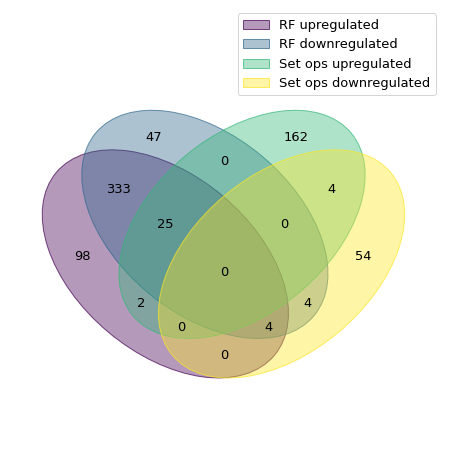

In [47]:
venn(allvenn)
plt.savefig("../../figures/02-Apr-2024_allsamp_coregenes_reg_overlaps.svg",bbox_inches="tight")
plt.savefig("../../figures/02-Apr-2024_allsamp_coregenes_reg_overlaps.png",bbox_inches="tight")
plt.savefig("../../figures/02-Apr-2024_allsamp_coregenes_reg_overlaps.pdf",bbox_inches="tight")

In [24]:
len(set.union(*rfall_reg.values()))

513

In [25]:
len(corrvenn["All samples RF"])

524

There are 11 core genes from random forest that are neither upregulated nor downregulated (for all samples).

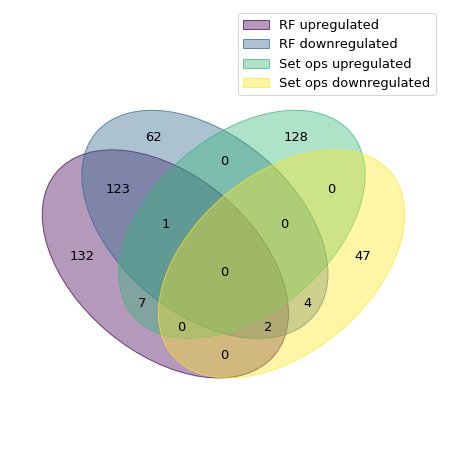

In [46]:
venn(psynvenn)
plt.savefig("../../figures/02-Apr-2024_psyn_coregenes_reg_overlaps.svg",bbox_inches="tight")
plt.savefig("../../figures/02-Apr-2024_psyn_coregenes_reg_overlaps.png",bbox_inches="tight")
plt.savefig("../../figures/02-Apr-2024_psyn_coregenes_reg_overlaps.pdf",bbox_inches="tight")

In [42]:
psynmethods = {"RF":psynvenn["RF upregulated"].union(psynvenn["RF downregulated"]),
               "Set ops":psynvenn["Set ops upregulated"].union(psynvenn["Set ops downregulated"])}
psynregs = {"Upregulated":psynvenn["RF upregulated"].union(psynvenn["Set ops upregulated"]),
           "Downregulated":psynvenn["RF downregulated"].union(psynvenn["Set ops downregulated"])}

<AxesSubplot: >

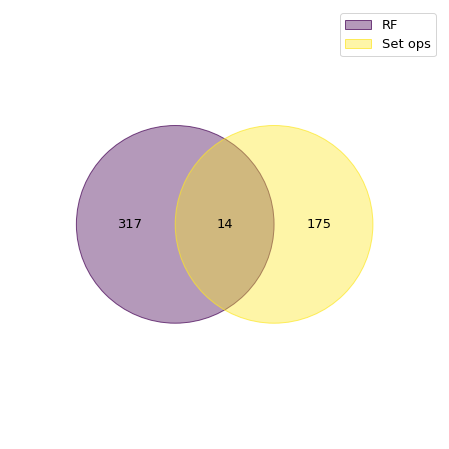

In [43]:
venn(psynmethods)

<AxesSubplot: >

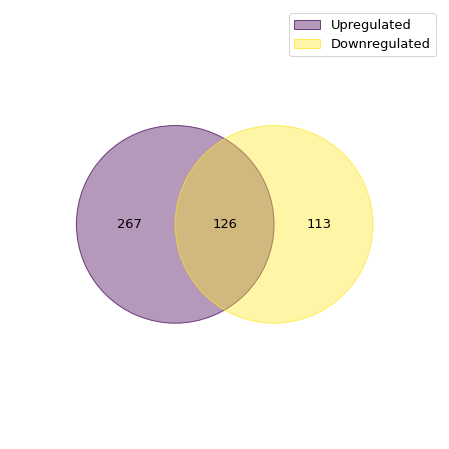

In [44]:
venn(psynregs)

In [27]:
len(set.union(*rfleaf_reg.values()))

331

In [28]:
len(corrvenn["Leaf RF"])

337

For photosynthetic tissues, there are 6 core genes from RF that are neither upregulated nor downregulated in any condition.

In [29]:
psynvenn.keys()

dict_keys(['RF upregulated', 'RF downregulated', 'Set ops upregulated', 'Set ops downregulated'])

In [30]:
# save one big JSON file with all the core genes, sliced a few different ways
## upregulated genes & downregulated genes for each method & both methods combined for both tissue sets

# construct the dictionary
jsondict = {
    "Photosynthetic_Tissues":{
        "Up_SetOps":list(psynvenn["Set ops upregulated"]),
        "Down_SetOps":list(psynvenn["Set ops downregulated"]),
        "Up_RF":list(psynvenn["RF upregulated"]),
        "Down_RF":list(psynvenn["RF downregulated"]),
        "Up_BothMethods":list(psynvenn["Set ops upregulated"].union(psynvenn["RF upregulated"])),
        "Down_BothMethods":list(psynvenn["Set ops downregulated"].union(psynvenn["RF downregulated"]))
    },
    "All_Samples":{
        "Up_SetOps":list(allvenn["Set ops upregulated"]),
        "Down_SetOps":list(allvenn["Set ops downregulated"]),
        "Up_RF":list(allvenn["RF upregulated"]),
        "Down_RF":list(allvenn["RF downregulated"]),
        "Up_BothMethods":list(allvenn["Set ops upregulated"].union(allvenn["RF upregulated"])),
        "Down_BothMethods":list(allvenn["Set ops downregulated"].union(allvenn["RF downregulated"]))
    }
}

In [31]:
import json

In [32]:
# save json file
with open("../../data/all_core_genes_25-Mar-2024.json","w+") as outfile:
    json.dump(jsondict,outfile,indent=4)

In [33]:
# save separate json files for photosynthetic & all tissues
with open("../../data/psyn_core_genes_25-Mar-2024.json","w+") as outfile:
    json.dump(jsondict["Photosynthetic_Tissues"],outfile,indent=4)
    
with open("../../data/allsamp_core_genes_25-Mar-2024.json","w+") as outfile:
    json.dump(jsondict["All_Samples"],outfile,indent=4)

In [34]:
jsondict["Photosynthetic_Tissues"].keys()

dict_keys(['Up_SetOps', 'Down_SetOps', 'Up_RF', 'Down_RF', 'Up_BothMethods', 'Down_BothMethods'])

In [35]:
# load the metadata
zmmd = pd.read_csv("../../data/Zm00001eb.1.fulldata_formatted.txt",sep="\t",header="infer")
zmmd.head()

,gene_model,assembly_version,annotation_version,transcript_count,canonical_transcript_name,tandem_count,chr,gm_start,gm_end,locus_symbol,locus_name,gene_products,obo_terms,obo_names
0,Zm00001eb000010,Zm-B73-REFERENCE-NAM-5.0,Zm00001eb.1,1,Zm00001eb000010_T001,,chr1,34617,40204,,...,...,"{GO:0006353,GO:0006355,GO:0003690,GO:0006353,G...","{""DNA-templated transcription, termination "",""..."
1,Zm00001eb000020,Zm-B73-REFERENCE-NAM-5.0,Zm00001eb.1,4,Zm00001eb000020_T001,,chr1,41214,46762,pco082477,...,...,"{GO:0016301,GO:0006511,GO:0140014,GO:0005813,G...","{""kinase activity"",""ubiquitin-dependent protei..."
2,Zm00001eb000030,Zm-B73-REFERENCE-NAM-5.0,Zm00001eb.1,,,2,chr1,106148,106620,,...,...,...,NaN
3,Zm00001eb000040,Zm-B73-REFERENCE-NAM-5.0,Zm00001eb.1,,,2,chr1,107080,108196,,...,...,...,NaN
4,Zm00001eb000050,Zm-B73-REFERENCE-NAM-5.0,Zm00001eb.1,1,Zm00001eb000050_T001,,chr1,108554,114382,,...,...,"{GO:0043047,GO:0005662,GO:0007004,GO:0006268,G...","{""single-stranded telomeric DNA binding"",""DNA ..."


In [36]:
# rename columns to strip extra whitespace from names
for c in zmmd.columns:
    zmmd.rename(columns={c:c.strip()},inplace=True)

In [37]:
# for each set of core genes, make a df showing general information about the gene
def make_cg_df(cgdict):
    upreg = []
    downreg = []
    RF = []
    setops = []
    
    allcg = list(set(cgdict["Up_BothMethods"]).union(set(cgdict["Down_BothMethods"])))
    
    for g in allcg:
        if g in cgdict["Up_BothMethods"]:
            upreg.append("Y")
        else:
            upreg.append("N")

        if g in cgdict["Down_BothMethods"]:
            downreg.append("Y")
        else:
            downreg.append("N")

        if g in cgdict["Up_SetOps"]:
            setops.append("Y")
        elif g in cgdict["Down_SetOps"]:
            setops.append("Y")
        else:
            setops.append("N")

        if g in cgdict["Up_RF"]:
            RF.append("Y")
        elif g in cgdict["Down_RF"]:
            RF.append("Y")
        else:
            RF.append("N")
            
    cg_info = pd.DataFrame(list(zip(allcg,upreg,downreg,RF,setops)),columns=["gene_model","Upregulated","Downregulated",
                                                                        "From_RF","From_Set_Ops"])
    
    cg_info2 = cg_info.merge(zmmd[["gene_model","locus_name"]])
    
    # remove excess space from the locus names
    names = []
    for n in list(cg_info2["locus_name"]):
        names.append(n.strip())
    cg_info2["Name"] = names
    
    cg_info_final = cg_info2[["gene_model","Name","Upregulated","Downregulated","From_RF","From_Set_Ops"]].rename(columns={"gene_model":"GeneID"})
    
    return cg_info_final

In [38]:
psyn_cg_info = make_cg_df(jsondict["Photosynthetic_Tissues"])
all_cg_info = make_cg_df(jsondict["All_Samples"])

In [39]:
psyn_cg_info.to_csv("../../data/core_genes_psyn_info_30-Mar-2024.tsv",sep="\t",header=True,index=False)
all_cg_info.to_csv("../../data/core_genes_all_info_30-Mar-2024.tsv",sep="\t",header=True,index=False)